# Stanford Dogs- Datasets

IMPORTED LIBRARIES 

In [10]:
import os
import numpy as np
import pandas as pd
import shutil
import xml.etree.ElementTree as ET
from PIL import Image
import glob
import matplotlib.pyplot as plt
import matplotlib.image as implit
import cv2,requests,math,glob
from pathlib import Path
from tabulate import tabulate 
import random
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

CLASSES AND ANNOTATION EXTRACTION FROM A DATASET

In [11]:
images_classes = ["n02093859-Kerry_blue_terrier","n02100236-German_short-haired_pointer","n02102177-Welsh_springer_spaniel","n02110063-malamute"]

original_dir = "Dataset_files\images"
destination_dir = "Dataset_files\extracted_image"
os.makedirs(destination_dir, exist_ok=True)

for class_name in images_classes:
    original_class_dir = os.path.join(original_dir, class_name)
    destination_class_dir = os.path.join(destination_dir, class_name)
    print(original_class_dir)
    
    os.makedirs(destination_class_dir, exist_ok=True)
    image_files = [f for f in os.listdir(original_class_dir)]
    
    for image_file in image_files:
        original_image_path = os.path.join(original_class_dir, image_file)
        destination_image_path = os.path.join(destination_class_dir, image_file)
        shutil.copyfile(original_image_path, destination_image_path)

Dataset_files\images\n02093859-Kerry_blue_terrier
Dataset_files\images\n02100236-German_short-haired_pointer
Dataset_files\images\n02102177-Welsh_springer_spaniel
Dataset_files\images\n02110063-malamute


In [12]:
Annotation_classes = ["n02093859-Kerry_blue_terrier","n02100236-German_short-haired_pointer","n02102177-Welsh_springer_spaniel","n02110063-malamute"]

original_dir = 'Dataset_files\Annotation'
destination_dir = 'Dataset_files\extracted_Annotation'
os.makedirs(destination_dir, exist_ok=True)

for class_name in Annotation_classes:
    original_class_dir = os.path.join(original_dir, class_name)
    destination_class_dir = os.path.join(destination_dir, class_name)
    print(original_class_dir)
    
    os.makedirs(destination_class_dir, exist_ok=True)
    image_files = [f for f in os.listdir(original_class_dir)]
    
    for image_file in image_files:
        source_image_path = os.path.join(original_class_dir, image_file)
        destination_image_path = os.path.join(destination_class_dir, image_file)
        shutil.copyfile(original_image_path, destination_image_path)

Dataset_files\Annotation\n02093859-Kerry_blue_terrier
Dataset_files\Annotation\n02100236-German_short-haired_pointer
Dataset_files\Annotation\n02102177-Welsh_springer_spaniel
Dataset_files\Annotation\n02110063-malamute


OBTAINING BOUNDING BOX INFORMATION USING XML MODULE

In [13]:
#Reference from Kaggle.com
def get_bounding_boxes(annot):
    xml = annot
    tree = ET.parse(xml)
    root = tree.getroot()
    objects = root.findall('object')
    bbox = []
    for o in objects:
        bndbox = o.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        bbox.append((xmin, ymin, xmax, ymax))
    return bbox

def get_image(annot):
    img_path = 'Dataset_files\images'  
    file = annot.split('\\') 
    img_filename = img_path + '\\' + file[-2] + '\\' + file[-1] + '.jpg'  
    return img_filename

In [14]:
dog_image = glob.glob ('Dataset_files\extracted_image/*/*')
annotations = glob.glob('Dataset_files\extracted_Annotation/*/*')
breeds = glob.glob('Dataset_files\extracted_Annotation/*')

print(len(dog_image),len(annotations),len(breeds))

659 660 4


# Cropping and resizing Images

In [15]:
output_dir = 'Dataset_files\Cropped_image'

dog_images = glob.glob('Dataset_files\extracted_image/*/*.jpg')
annotations = glob.glob('Dataset_files\extracted_Annotation/*/*.txt')

for i in range(len(dog_images)):
    if i >= len(annotations):
        break  
    
    bbox = get_bounding_boxes(annotations[i])
    dog = dog_images[i]
    im = Image.open(dog)
    
    class_name = os.path.split(os.path.dirname(dog))[2]
    
    class_output_dir = os.path.join(output_dir, class_name)
    os.makedirs(class_output_dir, exist_ok=True)
    
    for j in range(len(bbox)):
        im2 = im.crop(bbox[j])
        im2 = im2.resize((100, 100), Image.ANTIALIAS)
        
        new_path = os.path.join(class_output_dir, f"{i}-{j}.jpg")
        im2 = im2.convert('RGB')
        im2.save(new_path)


# (b) Histogram Equalization

In [16]:
image_dir = 'Dataset_files\extracted_image'
grayscale_image_by_class = {}

for class_dir in Path(image_dir).iterdir():
    if class_dir.is_dir():
        class_name = class_dir.name
        image_files = list(class_dir.glob("*.jpg")) 
        
        # selection of two image from each class
        class_images = []
        for i in range(min(len(image_files), 2)):
            image_path = image_files[i]
            image = cv2.imread(str(image_path))
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            class_images.append(gray_image)
            
        grayscale_image_by_class[class_name] = class_images

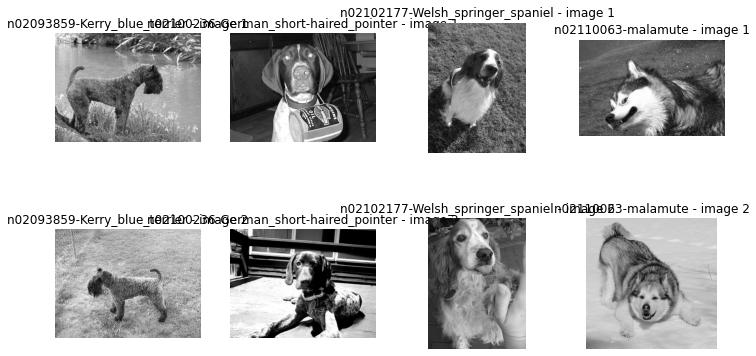

In [17]:
class_names = ["n02093859-Kerry_blue_terrier", "n02100236-German_short-haired_pointer", "n02102177-Welsh_springer_spaniel", "n02110063-malamute"]

fig, axes = plt.subplots(2, 4, figsize=(12, 6))
fig.subplots_adjust(hspace=0.5)

for i, class_name in enumerate(class_names):
    class_images = grayscale_image_by_class[class_name]

    for j, gray_image in enumerate(class_images):
        ax = axes[j, i]
        ax.imshow(gray_image, cmap='gray')
        ax.set_title(f'{class_name} - image {j+1}')  
        ax.axis('off')
plt.show()

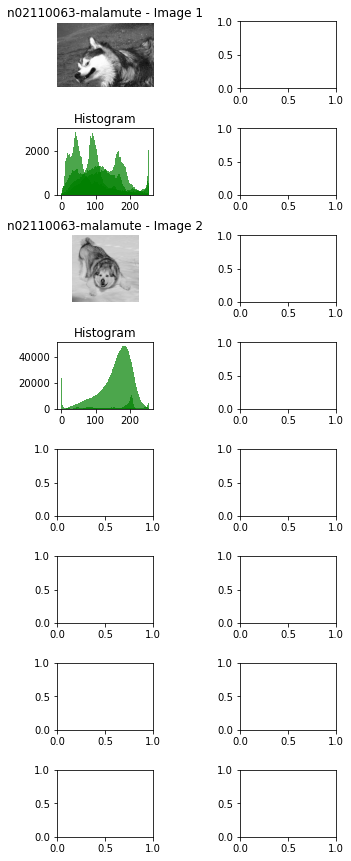

In [18]:
fig, axes = plt.subplots(8, 2, figsize=(5, 15))
fig.subplots_adjust(hspace=0.6, wspace=0.9)

for class_name in grayscale_image_by_class.keys():
    class_images = grayscale_image_by_class[class_name]
    
    for j, gray_image in enumerate(class_images):
        
        ax_left = axes[j * 2, 0]
        ax_left.imshow(gray_image, cmap='gray')
        ax_left.set_title(f'{class_name} - Image {j + 1}')
        ax_left.axis('off')
        

        ax_right = axes[j * 2 + 1, 0]
        ax_right.hist(gray_image.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
        ax_right.set_title('Histogram')
        
plt.show()

Fig: Equilized pixel intensity histogram (some error with tracking file location)

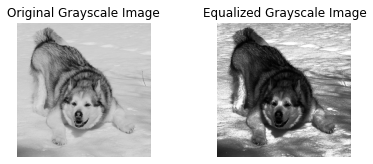

In [19]:
class_name = list(Path(image_dir).iterdir())[0].name
image_path = list(Path(image_dir, class_name).iterdir())[random.randint(1,150)]

equilized_image = cv2.equalizeHist(gray_image)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))
fig.subplots_adjust(wspace=0.5)

#plot the original grayscale image on the left
axes[0].imshow(gray_image, cmap='gray')
axes[0].set_title('Original Grayscale Image')
axes[0].axis('off')

#plot the equalized grayscale to the right
axes[1].imshow(equilized_image, cmap='gray')
axes[1].set_title('Equalized Grayscale Image')
axes[1].axis('off')

plt.show()

Equalized Grayscale Image has more color contrast than original Grayscale Image

# (c) RGB Histogram 

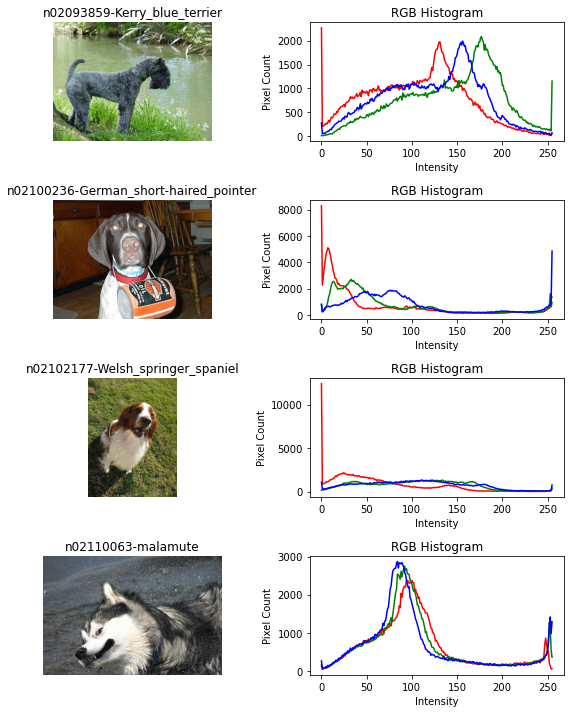

In [35]:
# Create a dictionary to store color images by class
color_images_by_class = {}

# Create subplots
fig, axes = plt.subplots(4, 2, figsize=(10, 12))
fig.subplots_adjust(hspace=0.5)
colors = ('red', 'green', 'blue')

for i, class_name in enumerate(images_classes):
    # Get the list of image files in the class directory
    class_dir = os.path.join(image_dir, class_name)
    image_files = list(Path(class_dir).iterdir())
    
    if len(image_files) > 0:
        # Select the first image from the class
        image_path = image_files[0]
        color_image = cv2.imread(str(image_path))
        color_images_by_class[class_name] = color_image
        
        # Display the color image
        ax_image = axes[i, 0]
        ax_image.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
        ax_image.set_title(class_name)
        ax_image.axis('off')
        
        # Plot the RGB histogram
        ax_hist = axes[i, 1]
        for channel_color, color in enumerate(colors):
            # Compute the histogram for the channel
            histogram, bin_edges = np.histogram(color_image[:, :, channel_color], bins=256, range=(0, 256))
            ax_hist.plot(bin_edges[:-1], histogram, color=color)
        
        ax_hist.set_title('RGB Histogram')
        ax_hist.set_xlabel('Intensity')
        ax_hist.set_ylabel('Pixel Count')

plt.show()

# (d) Histogram Comparison (Measures of Similarity and Dissimilarity)

In [21]:
#Histogram Comparision (Measure of Similarity and Dissimalarity)
grayscale_images_by_class = {}

#Function to load and convert images to grayscale
def load_and_convert_to_grayscale(image_path):
    image = cv2.imread(str(image_path))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return gray_image

for class_dir in Path(image_dir).iterdir():
    if class_dir.is_dir():
        class_name = class_dir.name
        image_files = list(class_dir.glob('*.jpg'))
        
        class_images = [load_and_convert_to_grayscale(image_path) for image_path in image_files if image_path.stem[:2] == image_files[0].stem[:2]]
        grayscale_images_by_class[class_name] = class_images
        
        
selected_classes = random.sample(list(grayscale_images_by_class.keys()), 2)
class_1_name, class_2_name = selected_classes

#Randomly choose two images from the same class and one image from the other classes
class_1_images = random.sample(grayscale_images_by_class[class_1_name],2)
class_2_images = random.sample(grayscale_images_by_class[class_2_name],1)

class_1_filenames = [image_path.stem for image_path in Path(image_dir, class_1_name).glob('*.jpg')]
class_2_filenames = [image_path.stem for image_path in Path(image_dir, class_2_name).glob('*.jpg')]


label_data = {
    'Class Name': [class_1_name, class_1_name, class_2_name],
    'Image Filename': [class_1_filenames[0], class_1_filenames[1], class_2_filenames[0]]
}

table = tabulate(label_data, headers='keys', tablefmt='fancy_grid')  # Use 'keys' for headers
print(table)


#Claculating histograms
def calculate_histogram(image):
    hist = cv2.calcHist([image], [0],None, [256], [0, 256])
    cv2.normalize(hist, hist, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    return hist

hist_class_1_1 = calculate_histogram(class_1_images[0])
hist_class_1_2 = calculate_histogram(class_1_images[1])
hist_class_2 = calculate_histogram(class_2_images[0])

╒═══════════════════════════════════════╤══════════════════╕
│ Class Name                            │ Image Filename   │
╞═══════════════════════════════════════╪══════════════════╡
│ n02100236-German_short-haired_pointer │ n02100236_1054   │
├───────────────────────────────────────┼──────────────────┤
│ n02100236-German_short-haired_pointer │ n02100236_111    │
├───────────────────────────────────────┼──────────────────┤
│ n02102177-Welsh_springer_spaniel      │ n02102177_1022   │
╘═══════════════════════════════════════╧══════════════════╛


Euclidean Distance

In [22]:
euclidean_distance_same_class = cv2.norm(hist_class_1_1, hist_class_1_2, normType=cv2.NORM_L1)
euclidean_distance_different_class = cv2.norm(hist_class_1_1, hist_class_2, normType= cv2.NORM_L1)

print('Euclidean Distance (Same Class):', euclidean_distance_same_class)
print('Euclidean Distance (Different Class):', euclidean_distance_different_class)

Euclidean Distance (Same Class): 77.88669891585596
Euclidean Distance (Different Class): 46.458241026848555


Histogram Intersection

In [23]:
same_class_compare = cv2.compareHist(hist_class_1_1, hist_class_1_2, cv2.HISTCMP_INTERSECT)
print('Histogram Intersection between same class', same_class_compare)

diff_class_compare = cv2.compareHist(hist_class_1_1, hist_class_1_2, cv2.HISTCMP_INTERSECT)
print('Histogram intersection between different class', diff_class_compare)

Histogram Intersection between same class 49.30902900156798
Histogram intersection between different class 49.30902900156798


Chisquare distance 

In [24]:
same_class_compare = cv2.compareHist(hist_class_1_1, hist_class_1_2, cv2.HISTCMP_CHISQR)
print('Chisquare intersection between same class:', same_class_compare)

diff_class_compare = cv2.compareHist(hist_class_1_1, hist_class_1_2, cv2.HISTCMP_CHISQR)
print('Chisquare intersect between different class:', diff_class_compare)

Chisquare intersection between same class: 181.74243808754872
Chisquare intersect between different class: 181.74243808754872


Manhattam Distance

In [25]:
def manhattan_distance(x,y):
    return sum(abs(v1 - v2) for v1, v2 in zip(x, y))

same_class_compare = manhattan_distance(hist_class_1_1, hist_class_1_2)
print('Manhattam Distance between sae class:', same_class_compare)

diff_class_compare = manhattan_distance(hist_class_1_1, hist_class_2)
print('Manhattam Distance between different class:', diff_class_compare)

Manhattam Distance between sae class: [77.88672]
Manhattam Distance between different class: [46.45823]


Bhattacharyya Distance

In [26]:
same_class_compare = cv2.compareHist(hist_class_1_1, hist_class_1_2, cv2.HISTCMP_BHATTACHARYYA)
print("Bhattacharya distance between same class:", same_class_compare)

diff_class_compare = cv2.compareHist(hist_class_1_1, hist_class_2, cv2.HISTCMP_BHATTACHARYYA)
print('Bhattacharya distance between different class:', diff_class_compare)

Bhattacharya distance between same class: 0.37931332179682326
Bhattacharya distance between different class: 0.27645178859757547


# (e) Image Feature Descriptor: ORB (Oriented FAST and Rotated BRIEF)

In [27]:
class_dirs = [class_dir for class_dir in Path(image_dir).iterdir() if class_dir.is_dir()]

random_class_dir = random.choice(class_dirs)
class_name = random_class_dir.name
image_files = list(random_class_dir.glob('*.jpg'))

random_image_file = random.choice(image_files)
image_filenames = random_image_file.name
print('Class Name:', class_name)
print('Image Filename:', image_filenames)

Class Name: n02093859-Kerry_blue_terrier
Image Filename: n02093859_612.jpg


In [28]:
import math

def ORB_cr(edgeThreshold, patchsize):
    print('Patchsize:', patchsize)
    orb = cv2.ORB_create(
    edgeThreshold=edgeThreshold, patchSize=patchsize, nlevels=8,
    fastThreshold=20, scaleFactor=1.2, WTA_K=2,
    scoreType=cv2.ORB_HARRIS_SCORE, nfeatures=50)
    
    return orb

Patchsize: 40
Threshold value: 10
No.of Keypoints: 50


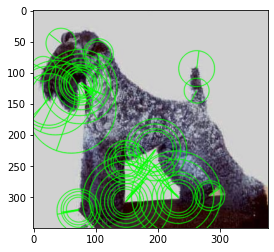

Patchsize: 40
Threshold value: 14
No.of Keypoints: 50


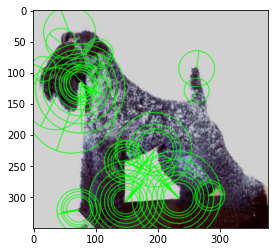

Patchsize: 40
Threshold value: 8
No.of Keypoints: 50


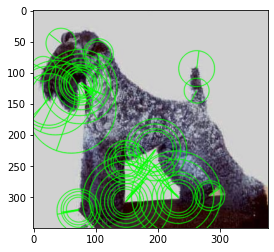

In [29]:
patchsize = 40
random_image = cv2.imread(str(random_image_file))
random_Threshold_values = random.sample(range(0, 30), 3)

for threshold_val in random_Threshold_values:
    orb = ORB_cr(threshold_val, int(patchsize))
    
    kp = orb.detect(random_image, None)
    
    kp_img = cv2.drawKeypoints(random_image, kp, None, color =(0, 255, 0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    
    print('Threshold value:', threshold_val)
    print('No.of Keypoints:', len(kp))
    plt.imshow(kp_img)
    plt.show()

 Number of keypoints extracted is 50 and patchSize you used is 40

# Dimensionality Reduction(using Principle ComponentAnalysis, PCA)

In [ ]:
def calcHist_func(image_path):
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    hist = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    hist = hist.ravel()
    return hist

In [31]:
all_histograms = []
all_class_names = []

selected_classes = random.sample(os.listdir(image_dir), 2)

for class_name in selected_classes:
    class_dir = os.path.join(image_dir, class_name)
    image_files = os.listdir(class_dir)
    
    for image_file in image_files:
        image_path = os.path.join(class_dir, image_file)
        hist = calcHist_func(image_path)  # Use the correct function name
        all_histograms.append(hist)
        all_class_names.append(class_name)
        
histogram_df = pd.DataFrame(all_histograms, columns=[f'pixel_value_{i+1}' for i in range(256)])

scaler = StandardScaler()
scaled_data = scaler.fit_transform(histogram_df)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

explained_variance_ratio = pca.explained_variance_ratio_
print('Explained Variance Ratio:', explained_variance_ratio)

singular_values = pca.singular_values_
print('Singular values (Eigenvalues):', singular_values)

Explained Variance Ratio: [0.54846843 0.13006176]
Singular values (Eigenvalues): [215.2547624  104.82183505]


In [32]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

explained_variance_ratios = pca.explained_variance_ratio_
print('PCA Explained Variance Ratios:')
for i, ratio in enumerate(explained_variance_ratios):
    print(f'Component {i + 1}: {ratio:.4f}')

singular_values = pca.singular_values_
print("PCA Singular Values (Eigenvalues):")
for i, value in enumerate(singular_values):
    print(f'Component {i + 1}: {value:.4f}')

PCA Explained Variance Ratios:
Component 1: 0.5485
Component 2: 0.1301
PCA Singular Values (Eigenvalues):
Component 1: 215.2548
Component 2: 104.8218


2D points using two different colors

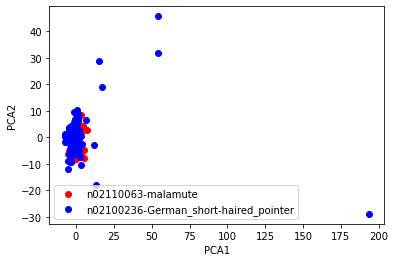

In [33]:
reduced_df = pd.DataFrame(data=reduced_data, columns=['PCA1', 'PCA2'])
reduced_df['class'] = all_class_names

class_1_data = reduced_df[reduced_df['class'] == selected_classes[0]]
class_2_data = reduced_df[reduced_df['class'] == selected_classes[1]]

plt.scatter(class_1_data['PCA1'], class_1_data['PCA2'], c='red', label=selected_classes[0])
plt.scatter(class_2_data['PCA1'], class_2_data['PCA2'], c='blue', label=selected_classes[1])

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()

plt.show()